# Assignment 1 - NLP

### Submitted by - Tanvi Gujral (R00195179)

In [2]:
!pip install textblob

In [3]:
#import all the required libraries

import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from textblob import Word
import re 

In [4]:
#importing scikit learn library

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

### Reading Data from tsv
### (i) Training Data from MADAR-Corpus-26-train.tsv 
### (ii) Test Data from MADAR-Corpus-26-dev.tsv

In [8]:
#reading training and test data

trainingdata_MADAR_Corpus26 = pd.read_csv('C:\\Users\\gagan\\Documents\\Tanvi\\NLP\\Project_1_tools_&_data\\Project_1_tools_and_data\\dataset\\MADAR-Corpus-26-train.tsv', sep='\t', names=["Sentence", "Dialect"])

testdata_MADAR_Corpus26 = pd.read_csv('C:\\Users\\gagan\\Documents\\Tanvi\\NLP\\Project_1_tools_&_data\\Project_1_tools_and_data\\dataset\\MADAR-Corpus-26-dev.tsv', sep='\t', names=["Sentence", "Dialect"])

### Training Data head

In [9]:
trainingdata_MADAR_Corpus26.head()

,Sentence,Dialect
0,هناك ، أمام بيانات السائح تماما .,MSA
1,لم اسمع بهذا العنوان من قبل بالقرب من هنا .,MSA
2,استمر في السير في هذا الطريق حتى تجد صيدلية .,MSA
3,كم تكلفة الإفطار ؟,MSA
4,كيف أستطيع مساعدتك ؟,MSA


### Test Data head

In [10]:
testdata_MADAR_Corpus26.head()

,Sentence,Dialect
0,بالمناسبة ، اسمي هيروش إيجيما .,MSA
1,"هذا القطار يتوقف في لاك فورست , أليس كذلك ؟",MSA
2,"هذا الكارت , حسناً ؟",MSA
3,لم يخرج من الماكينة شيء .,MSA
4,عندك أية شيء يمكن أن أتعاطه للطفح الجلدي ؟,MSA


# Step 1 : DATA PRE-PROCESSING

## a) Removing Punctuations and Symbols

In [11]:
# We have a lot of special characters in Arabic, some of them are in the below list: 
# ["؛","!","؟","-",":","(",")","“","\"",".","،"]
# To ensure removal of all the punctuation and symbols,
# we are using a Regular expression [^\w\s] which means
# anything which is not a word or a white space should be replaced with "".
# Applying the same on both the training and test data.

In [12]:
# Removing Punctuation, Symbols
trainingdata_MADAR_Corpus26['Sentence']=trainingdata_MADAR_Corpus26['Sentence'].str.replace('[^\w\s]','')
testdata_MADAR_Corpus26['Sentence']=testdata_MADAR_Corpus26['Sentence'].str.replace('[^\w\s]','')

### Output after Punctuations/Symbols removal

In [13]:
trainingdata_MADAR_Corpus26.head()

,Sentence,Dialect
0,هناك أمام بيانات السائح تماما,MSA
1,لم اسمع بهذا العنوان من قبل بالقرب من هنا,MSA
2,استمر في السير في هذا الطريق حتى تجد صيدلية,MSA
3,كم تكلفة الإفطار,MSA
4,كيف أستطيع مساعدتك,MSA


In [14]:
testdata_MADAR_Corpus26.head()

,Sentence,Dialect
0,بالمناسبة اسمي هيروش إيجيما,MSA
1,هذا القطار يتوقف في لاك فورست أليس كذلك,MSA
2,هذا الكارت حسنا,MSA
3,لم يخرج من الماكينة شيء,MSA
4,عندك أية شيء يمكن أن أتعاطه للطفح الجلدي,MSA


## b) Removing Stop Words

In [15]:
# Removing Stop Words using NLTK in both our Training and Test data

stop=stopwords.words('arabic')

trainingdata_MADAR_Corpus26['Sentence']=trainingdata_MADAR_Corpus26['Sentence'].apply(lambda x:" ".join(x for x in x.split()
                                                                                                        if x not in stop))
testdata_MADAR_Corpus26['Sentence']=testdata_MADAR_Corpus26['Sentence'].apply(lambda x:" ".join(x for x in x.split()
                                                                                                        if x not in stop))

### Output after Stopwords removal

In [16]:
trainingdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,أمام بيانات السائح تماما,MSA
1,اسمع بهذا العنوان قبل بالقرب,MSA
2,استمر السير الطريق تجد صيدلية,MSA
3,تكلفة الإفطار,MSA
4,أستطيع مساعدتك,MSA


In [17]:
testdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,بالمناسبة اسمي هيروش إيجيما,MSA
1,القطار يتوقف لاك فورست أليس,MSA
2,الكارت حسنا,MSA
3,يخرج الماكينة شيء,MSA
4,عندك أية شيء يمكن أتعاطه للطفح الجلدي,MSA


## c) Lemmatisation

In [18]:
#Lemmatisatising our Training and Test Data

trainingdata_MADAR_Corpus26['Sentence']=trainingdata_MADAR_Corpus26['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

testdata_MADAR_Corpus26['Sentence']=testdata_MADAR_Corpus26['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


### Output after Lemmatisation

In [19]:
trainingdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,أمام بيانات السائح تماما,MSA
1,اسمع بهذا العنوان قبل بالقرب,MSA
2,استمر السير الطريق تجد صيدلية,MSA
3,تكلفة الإفطار,MSA
4,أستطيع مساعدتك,MSA


In [20]:
testdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,بالمناسبة اسمي هيروش إيجيما,MSA
1,القطار يتوقف لاك فورست أليس,MSA
2,الكارت حسنا,MSA
3,يخرج الماكينة شيء,MSA
4,عندك أية شيء يمكن أتعاطه للطفح الجلدي,MSA


## d) Letter Repetitions

In [21]:
#Correcting Letter Repetitions on training and test data
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

trainingdata_MADAR_Corpus26['Sentence'] = trainingdata_MADAR_Corpus26['Sentence'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

testdata_MADAR_Corpus26['Sentence'] = testdata_MADAR_Corpus26['Sentence'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

### Output after Letter Repetitions correction

In [22]:
trainingdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,أمام بيانات السائح تماما,MSA
1,اسمع بهذا العنوان قبل بالقرب,MSA
2,استمر السير الطريق تجد صيدلية,MSA
3,تكلفة الإفطار,MSA
4,أستطيع مساعدتك,MSA


In [23]:
testdata_MADAR_Corpus26.head(5)

,Sentence,Dialect
0,بالمناسبة اسمي هيروش إيجيما,MSA
1,القطار يتوقف لاك فورست أليس,MSA
2,الكارت حسنا,MSA
3,يخرج الماكينة شيء,MSA
4,عندك أية شيء يمكن أتعاطه للطفح الجلدي,MSA


## e. Encoding output labels

In [24]:
#Encoding output labels
encoding = preprocessing.LabelEncoder()

#using fit transform on training data
y = encoding.fit_transform(trainingdata_MADAR_Corpus26.Dialect.values)

#using transform on test data
z = encoding.transform(testdata_MADAR_Corpus26.Dialect.values)

In [25]:
len(y) #checking encoded training data length

41600

In [26]:
len(z) #checking encoded training data length

5200

## f. Tokenizing text

In [27]:
# Tokenize the text in training and test data
tokenized_training_text = [word_tokenize(sent) for sent in trainingdata_MADAR_Corpus26.Sentence.values]
tokenized_test_text = [word_tokenize(sent) for sent in testdata_MADAR_Corpus26.Sentence.values]

# SYSTEM IMPLEMENTATION

## 1. Feature-Based Classification for Dialectal Arabic

In [28]:
# Splitting into training and testing data in 80:20 ratio

X_train, X_val, y_train, y_val = train_test_split(trainingdata_MADAR_Corpus26.Sentence.values, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)


### Function for EVALUATING the Word-gram and Char-gram systems

In [29]:
def evaluation(y_pred, z):
    
    ## computes overall scores (accuracy, f1, recall, precision)
    accuracy = accuracy_score(y_pred, z) * 100
    f1 = f1_score(y_pred, z, average = "macro") * 100
    recall = recall_score(y_pred, z, average = "macro") * 100
    precision = precision_score(y_pred, z, average = "macro") * 100
    
    print ("\nOVERALL SCORES:")
    
    ## prints overall scores (accuracy, f1, recall, precision)
    print ("MACRO AVERAGE PRECISION SCORE: %.2f" %precision, "%")
    print ("MACRO AVERAGE RECALL SCORE: %.2f" %recall, "%")
    print ("MACRO AVERAGE F1 SCORE: %.2f" %f1, "%")
    print ("OVERALL ACCURACY: %.2f" %accuracy, "%\n")

### (i) For Word Gram

In [30]:
# Extracting TF-IDF parameters for WORD-GRAM

#Word-gram features with uni-gram, bi-gram and tri-gram;
tfidf = TfidfVectorizer(tokenizer=word_tokenize, analyzer='word',ngram_range=(1,3)) 

X_train_tfidf = tfidf.fit_transform(X_train)

X_val_tfidf = tfidf.transform(X_val)

X_test_tfidf = tfidf.transform(testdata_MADAR_Corpus26.Sentence.values)

In [31]:
X_train_tfidf.shape 

(33280, 189866)

In [32]:
X_val_tfidf.shape

(8320, 189866)

In [33]:
X_test_tfidf.shape

(5200, 189866)

### a. Using Multinomial Naive Bayes Classifier

In [34]:
# Model 1: Multinomial Naive Bayes Classifier for Word Gram
nb = MultinomialNB() 
nb.fit(X_train_tfidf, y_train) 
y_pred = nb.predict(X_test_tfidf)
print("For Word Gram, using Naive Bayes: ")
evaluation(y_pred,z)


For Word Gram, using Naive Bayes: 

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 57.90 %
MACRO AVERAGE RECALL SCORE: 58.96 %
MACRO AVERAGE F1 SCORE: 58.07 %
OVERALL ACCURACY: 57.90 %



### b. Using Linear SVM Classifier

In [35]:
# Model 2: Linear SVM Classifier for Word Gram
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None) 
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_test_tfidf)
print("For Word Gram, using SVM: ")
evaluation(y_pred,z)

For Word Gram, using SVM: 

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 54.15 %
MACRO AVERAGE RECALL SCORE: 54.86 %
MACRO AVERAGE F1 SCORE: 53.71 %
OVERALL ACCURACY: 54.15 %



### (ii) For Char Gram

In [36]:
# Extracting TF-IDF parameters for CHAR-GRAM

#Character-gram features with/without word boundary consideration, from bi-gram up to 5-gram
tfidf = TfidfVectorizer(analyzer='char',ngram_range=(2,5)) 

X_train_tfidf = tfidf.fit_transform(X_train)

X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(testdata_MADAR_Corpus26.Sentence.values)

### a. Using Multinomial Naive Bayes Classifier

In [37]:
# Model 1: Multinomial Naive Bayes Classifier for Char Gram
nb = MultinomialNB() 
nb.fit(X_train_tfidf, y_train) 
y_pred = nb.predict(X_test_tfidf)
print("For Char Gram, using Naive Bayes: ")
evaluation(y_pred,z)

For Char Gram, using Naive Bayes: 

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 55.33 %
MACRO AVERAGE RECALL SCORE: 56.20 %
MACRO AVERAGE F1 SCORE: 55.14 %
OVERALL ACCURACY: 55.33 %



### b. Using Linear SVM Classifier

In [38]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None) 
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_test_tfidf)
print("For Word Gram, using SVM: ")
evaluation(y_pred,z)

For Word Gram, using SVM: 

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 54.75 %
MACRO AVERAGE RECALL SCORE: 55.00 %
MACRO AVERAGE F1 SCORE: 53.88 %
OVERALL ACCURACY: 54.75 %



# 2. LSTM

## Loading the model

In [41]:
import gensim
import re
import pickle
import matplotlib.pyplot as plt

In [42]:
# Downloading the model

with open('Twittert-CBOW/tweet_cbow_100/tweets_cbow_100', 'rb') as f:
    ngram_Model=pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Twittert-CBOW/tweet_cbow_100/tweets_cbow_100'

In [95]:
print(len(ngram_Model.wv.index2word)," loaded")

1476715  loaded


## Finding Unique Tokens

In [143]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from keras.layers import Dropout, SpatialDropout1D, LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Reshape

In [35]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(trainingdata_MADAR_Corpus26['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 27203 unique tokens.


## Padding features

#### Truncate and pad the input sequences so that they are all in the same length for modeling

### On the Training Sentences 

In [85]:
X = tokenizer.texts_to_sequences(trainingdata_MADAR_Corpus26['Sentence'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (41600, 250)


### On the Test Sentences 

In [76]:
Xbar = tokenizer.texts_to_sequences(testdata_MADAR_Corpus26['Sentence'].values)
Xbar = pad_sequences(Xbar, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', Xbar.shape)

Shape of data tensor: (5200, 250)


## Encoding labels

#### Converting categorical labels to numbers

### On the Training Dialects 

In [77]:
Y = pd.get_dummies(trainingdata_MADAR_Corpus26['Dialect']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (41600, 26)


### On the Test Dialects 

In [78]:
Ybar = pd.get_dummies(testdata_MADAR_Corpus26['Dialect']).values
print('Shape of label tensor:', Ybar.shape)

Shape of label tensor: (5200, 26)


### Train Test Split

In [79]:
# Splitting into training and testing data in 90:10 ratio
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(37440, 250) (37440, 26)
(4160, 250) (4160, 26)


### Training the LSTM model

In [80]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))

#LSTM layer with 100 memory units
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

#output layer creates 26 output values, one for each class
#Activation function is softmax for multi-class classification
model.add(Dense(26, activation='softmax'))

# Categorical_crossentropy is used as the loss function as it is multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
527/527 [==============================] - 661s 1s/step - loss: 2.6440 - accuracy: 0.2205 - val_loss: 1.9788 - val_accuracy: 0.3705
Epoch 2/5
527/527 [==============================] - 691s 1s/step - loss: 1.5702 - accuracy: 0.4793 - val_loss: 1.7113 - val_accuracy: 0.4359
Epoch 3/5
527/527 [==============================] - 702s 1s/step - loss: 1.1307 - accuracy: 0.6263 - val_loss: 1.7473 - val_accuracy: 0.4501
Epoch 4/5
527/527 [==============================] - 710s 1s/step - loss: 0.8791 - accuracy: 0.7160 - val_loss: 1.8528 - val_accuracy: 0.4549
Epoch 5/5
527/527 [==============================] - 723s 1s/step - loss: 0.7297 - accuracy: 0.7633 - val_loss: 1.9341 - val_accuracy: 0.4543


### Accuracy on Test Data = 44.4%

In [109]:
accr = model.evaluate(Xbar,Ybar)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

163/163 [==============================] - 15s 90ms/step - loss: 1.5748 - accuracy: 0.5310
Test set
  Loss: 1.923
  Accuracy: 0.444


### Plotting Loss

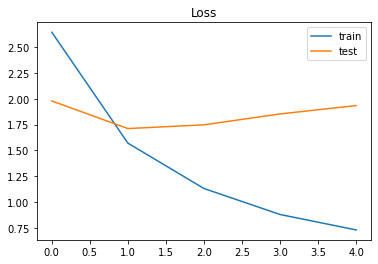

In [86]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

### Plotting Accuracy

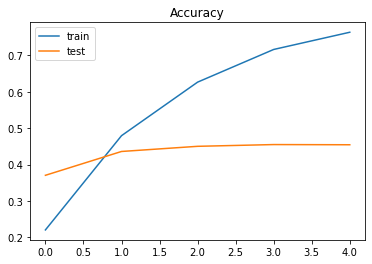

In [88]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# 3. BERT for Dialectal Arabic

### Reference1 - https://medium.com/huggingface/multi-label-text-classification-using-bert-the-mighty-transformer-69714fa3fb3d
### Refeerence2 - https://github.com/huggingface/transformers/commit/00ea45659fecdbac904bd29c1bcea5976b9cfdda
### Reference3 - https://github.com/Shivampanwar/Bert-text-classification/tree/master/XLNet